In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
Path_Dir = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


Example of an audio filename - 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [3]:
emotion_labels = []
audio_paths = []

for root, dirs, files in os.walk(Path_Dir):
    for file in files:
        if file.endswith('.wav'):
            file_parts = file.split('-')
            emotion_code = int(file_parts[2])
            
            emotion_map = {
                1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry',
                6: 'fear', 7: 'disgust', 8: 'surprise'
            }
            emotion_labels.append(emotion_map.get(emotion_code, 'unknown'))
            audio_paths.append(os.path.join(root, file))

Ravdess_df = pd.DataFrame({
    'Emotions': emotion_labels,
    'Path': audio_paths
})

Ravdess_df.head()

Emotions                                               Path
0  surprise  ../input/ravdess-emotional-speech-audio/audio_...
1   neutral  ../input/ravdess-emotional-speech-audio/audio_...
2   disgust  ../input/ravdess-emotional-speech-audio/audio_...
3   disgust  ../input/ravdess-emotional-speech-audio/audio_...
4   neutral  ../input/ravdess-emotional-speech-audio/audio_...

In [4]:
print('The total number of audio files:', Ravdess_df.shape[0])

The total number of audio files: 1440


In [5]:
Ravdess_df.Emotions.value_counts()

Emotions
surprise    192
disgust     192
fear        192
sad         192
happy       192
calm        192
angry       192
neutral      96
Name: count, dtype: int64

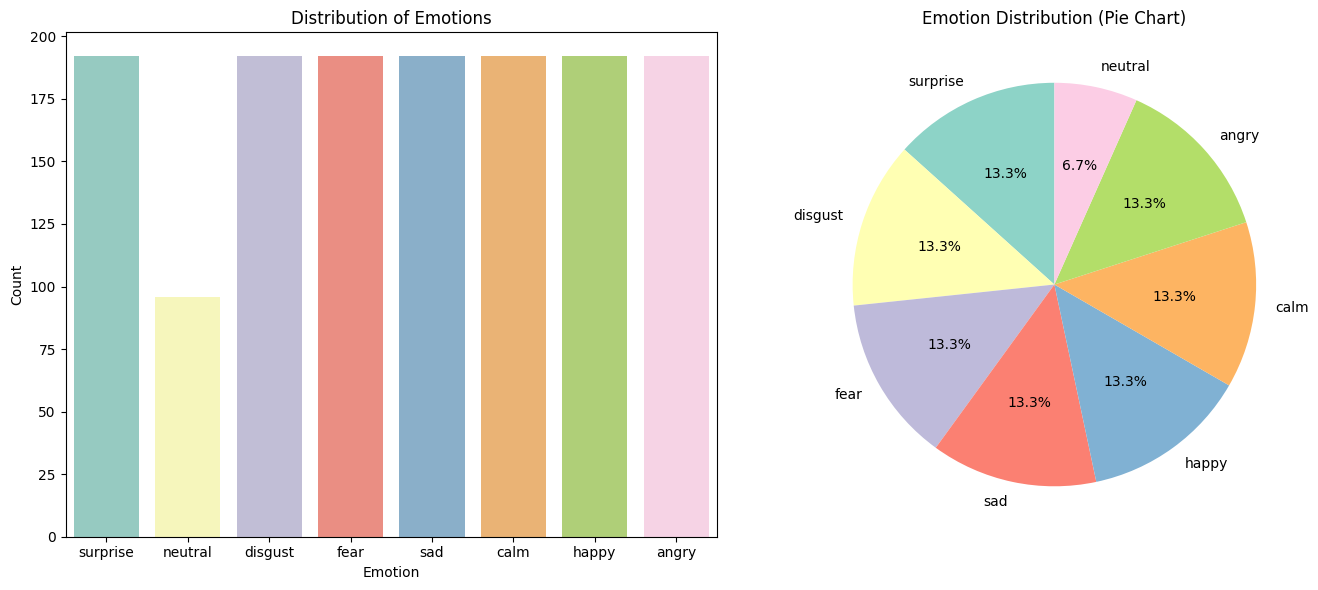

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=Ravdess_df, x='Emotions', ax=ax[0], palette='Set3')
ax[0].set_title('Distribution of Emotions')
ax[0].set_xlabel('Emotion')
ax[0].set_ylabel('Count')
emotion_counts = Ravdess_df['Emotions'].value_counts()
ax[1].pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', n_colors=len(emotion_counts)))
ax[1].set_title('Emotion Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

In [7]:
def plot_audio_waveform(audio_data, sample_rate, emotion_label):
    """
    Plots the waveform of the audio signal.

    Parameters:
    audio_data (ndarray): The audio signal data.
    sample_rate (int): The sample rate of the audio.
    emotion_label (str): The emotion label corresponding to the audio.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(audio_data) / sample_rate, len(audio_data)), audio_data, color='blue')
    plt.title(f"Waveform for Audio with Emotion: {emotion_label}", fontsize=14)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()

In [8]:
def plot_audio_spectrogram(audio_data, sample_rate, emotion_label):
    """
    Plots the spectrogram of the audio signal.

    Parameters:
    audio_data (ndarray): The audio signal data.
    sample_rate (int): The sample rate of the audio.
    emotion_label (str): The emotion label corresponding to the audio.
    """
    stft_result = librosa.stft(audio_data)
    decibel_spectrogram = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(decibel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram for Audio with Emotion: {emotion_label}", fontsize=14)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

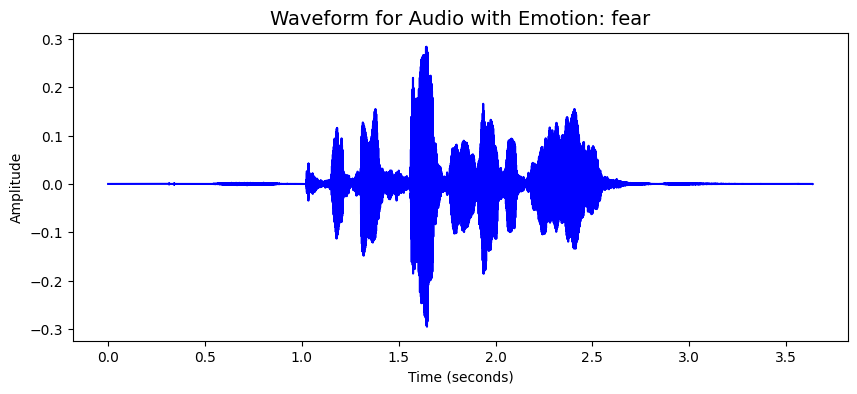

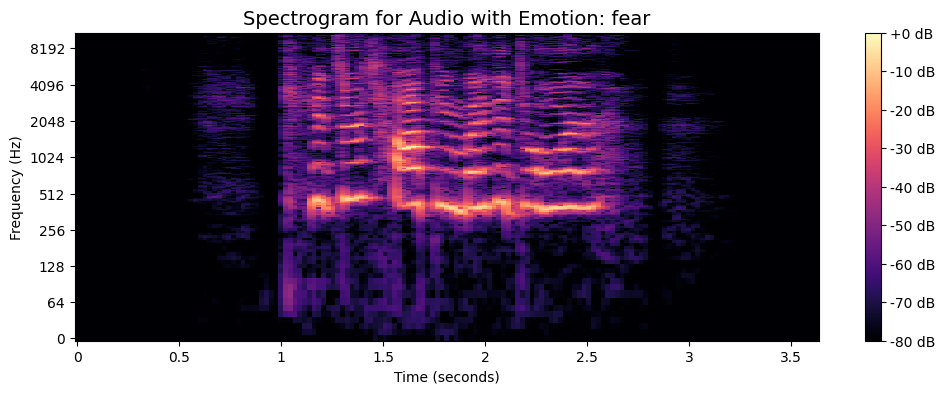

In [9]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

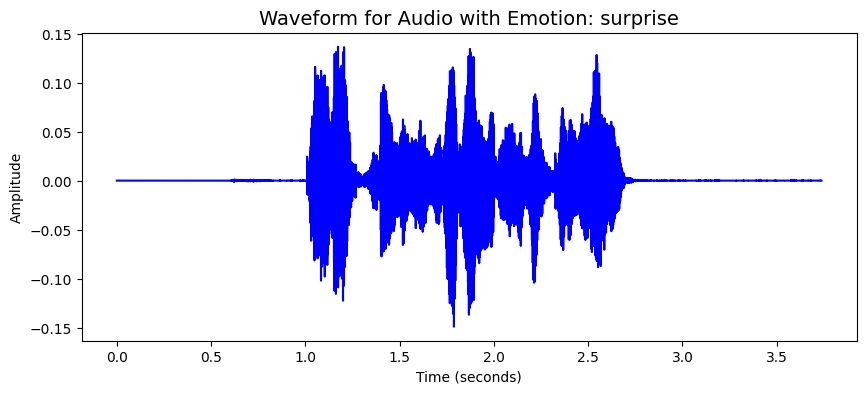

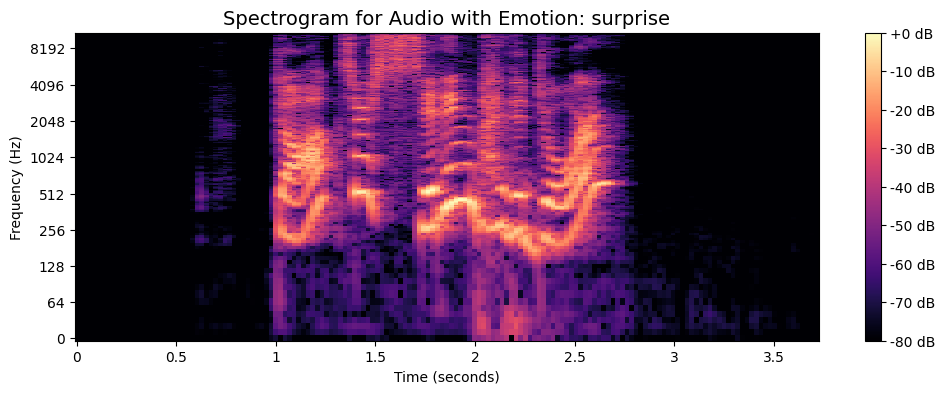

In [10]:
emotion='surprise'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

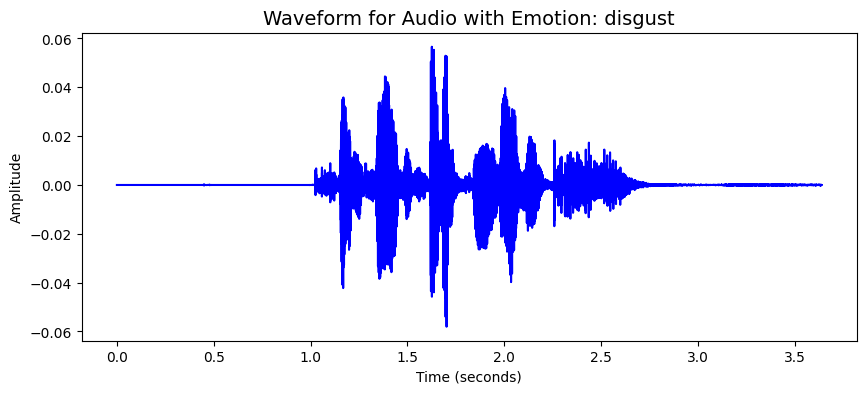

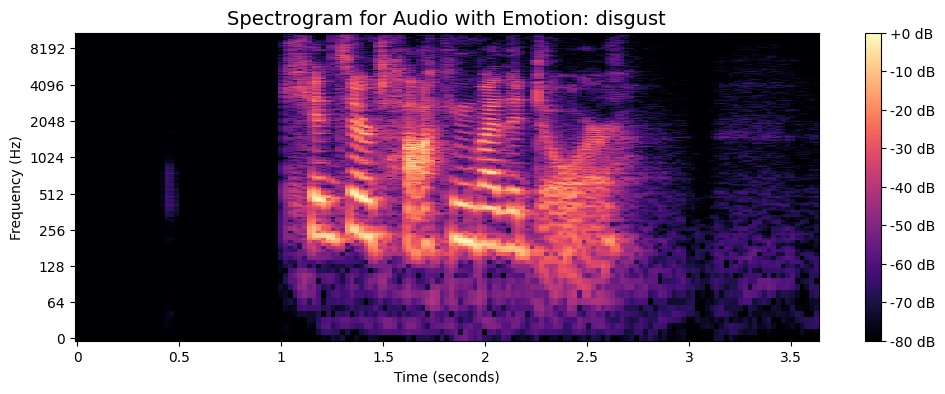

In [11]:
emotion='disgust'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

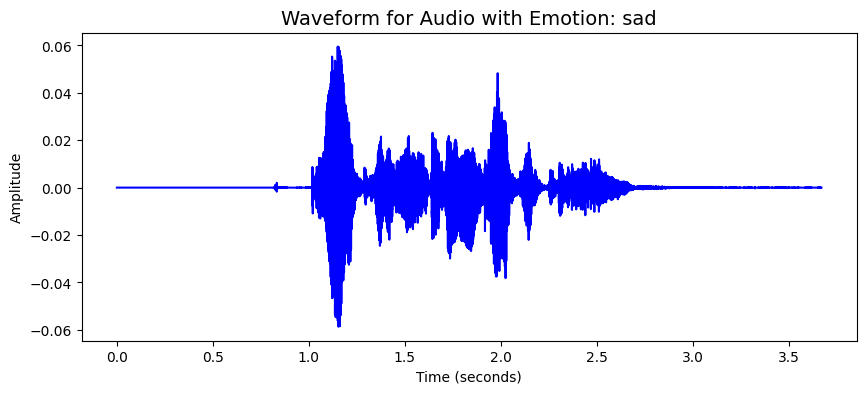

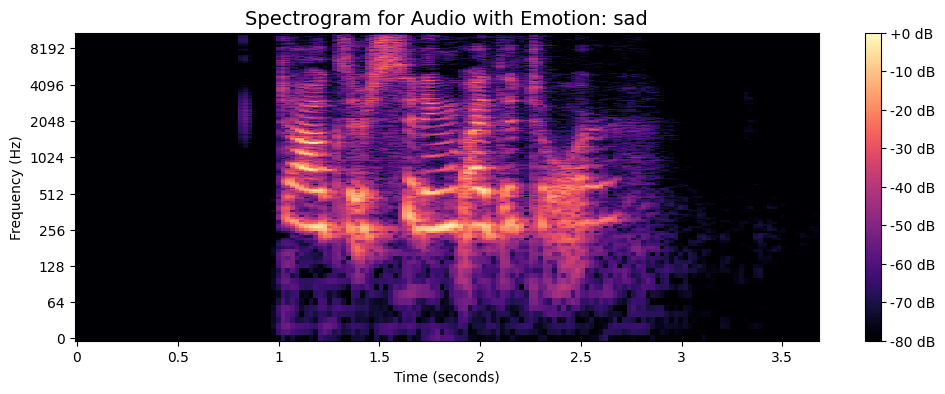

In [12]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

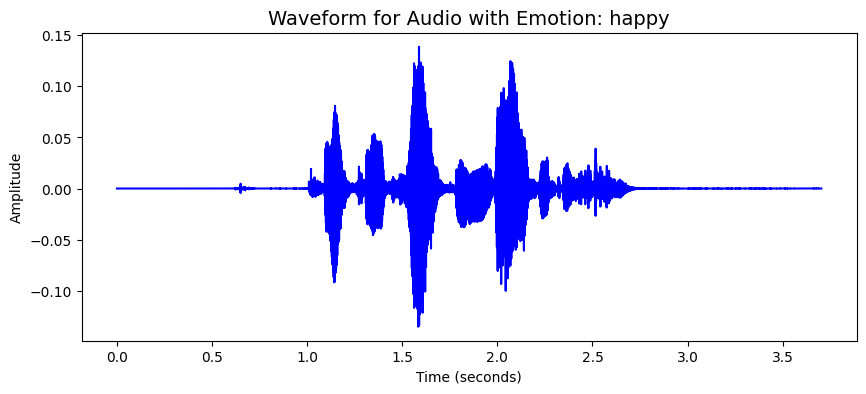

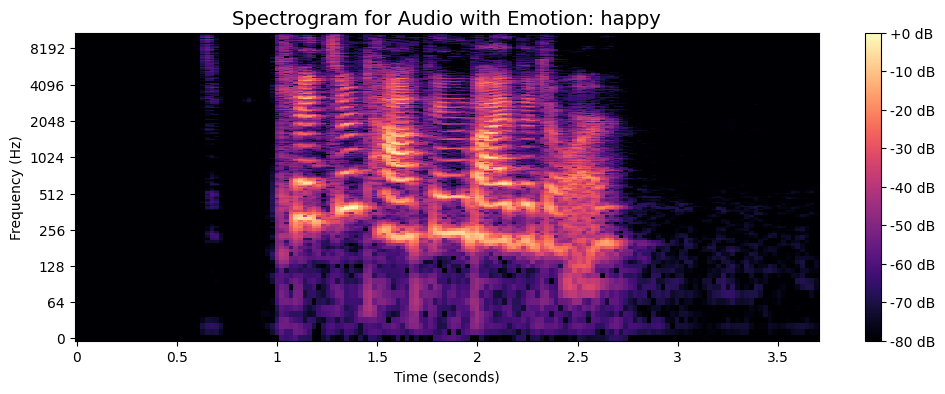

In [13]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

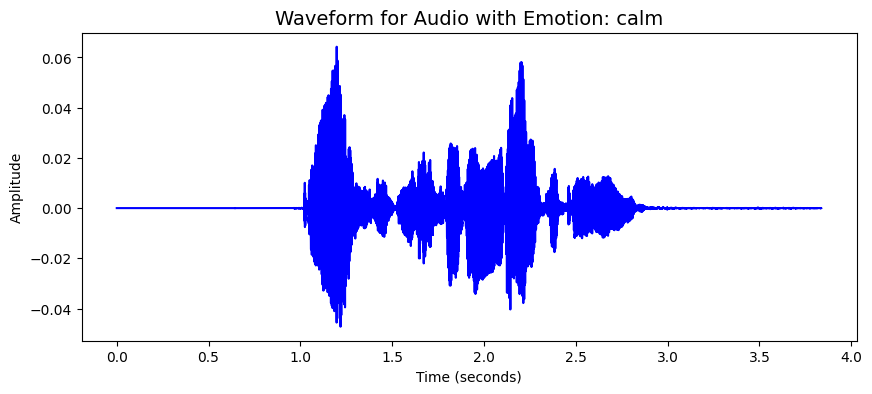

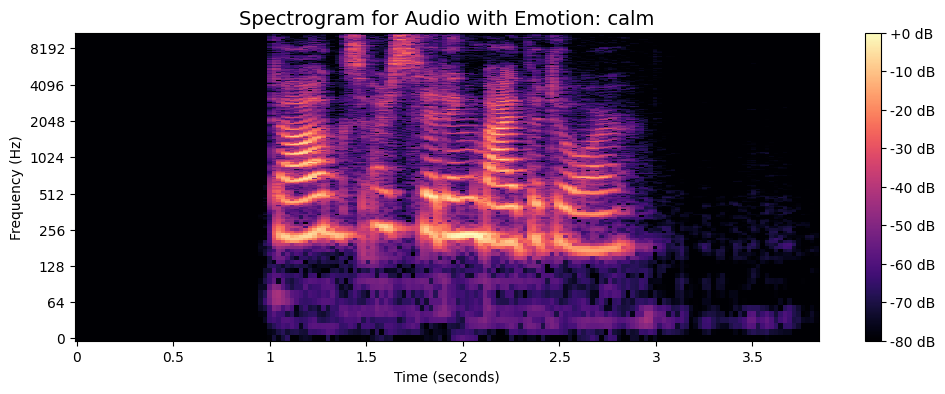

In [14]:
emotion='calm'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

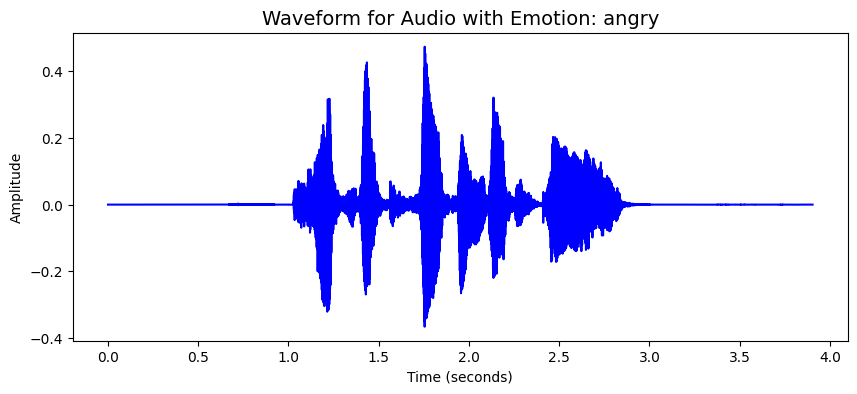

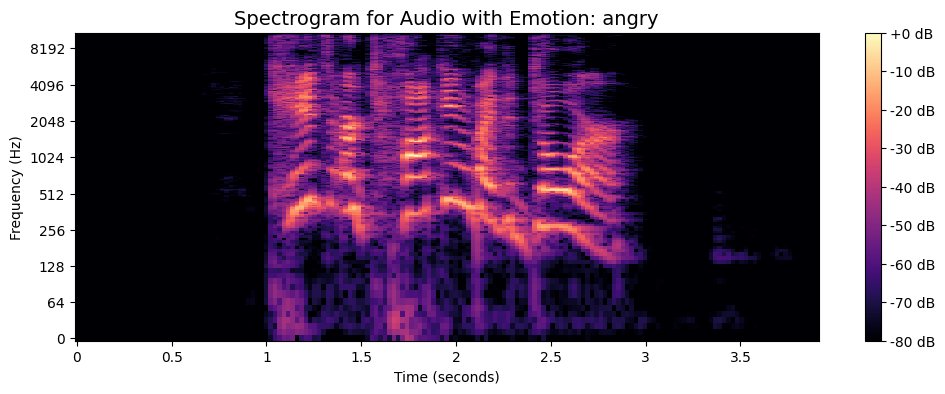

In [15]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

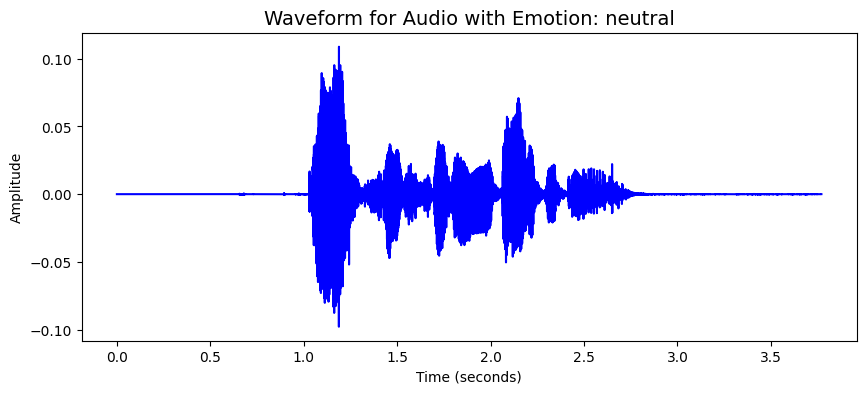

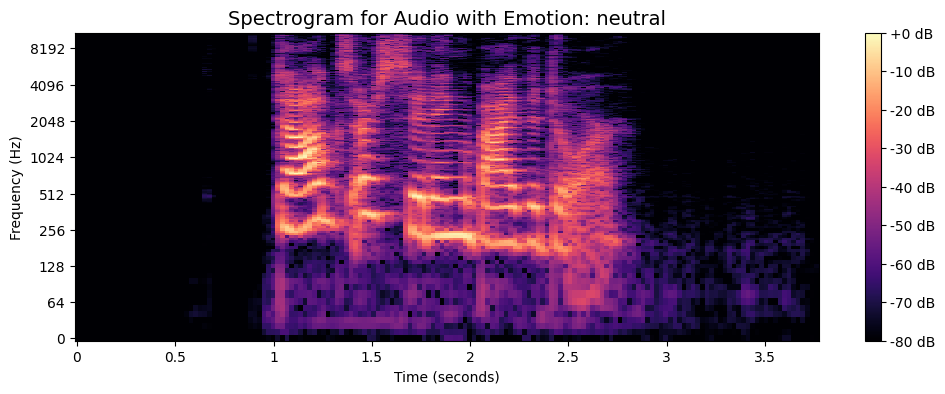

In [16]:
emotion='neutral'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plot_audio_waveform(data, sampling_rate, emotion)
plot_audio_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def add_noise(audio_signal, noise_level=0.02):
    """
    Add random noise to the audio signal.
    """
    max_amplitude = np.max(audio_signal)
    noise = noise_level * max_amplitude * np.random.normal(size=audio_signal.shape)
    return audio_signal + noise

In [18]:
def change_speed(audio_signal, speed_factor=1.2):
    """
    Adjust the speed of the audio signal.
    """
    return librosa.effects.time_stretch(audio_signal, rate=speed_factor)

In [19]:
def shift_audio(audio_signal, shift_max=5000):
    """
    Shift the audio signal forward or backward.
    """
    shift_amount = np.random.randint(-shift_max, shift_max)
    return np.roll(audio_signal, shift_amount)

In [20]:
def change_pitch(audio_signal, sampling_rate, pitch_shift=1.0):
    """
    Adjust the pitch of the audio signal.
    """
    return librosa.effects.pitch_shift(audio_signal, sr=sampling_rate, n_steps=pitch_shift)

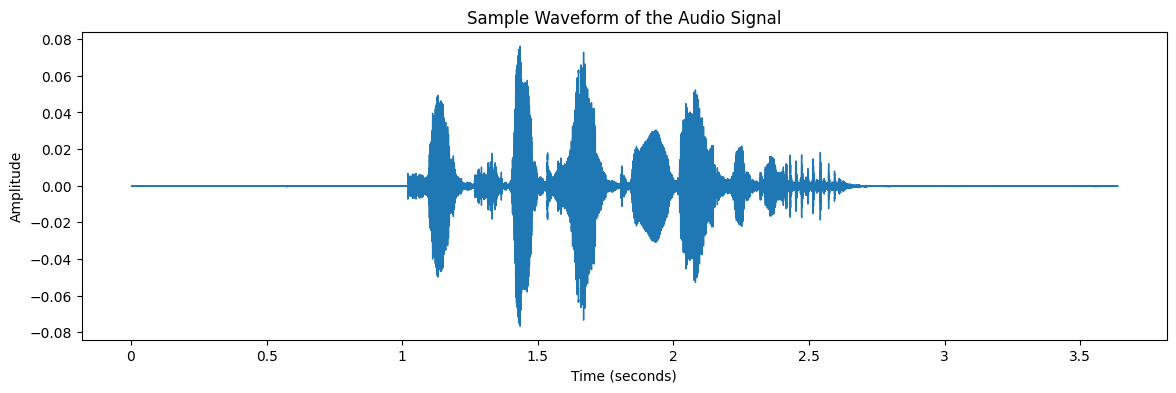

In [21]:
path = np.array(Ravdess_df.Path)[1]
audio_data, sr = librosa.load(path)


plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=audio_data, sr=sr)
plt.title("Sample Waveform of the Audio Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

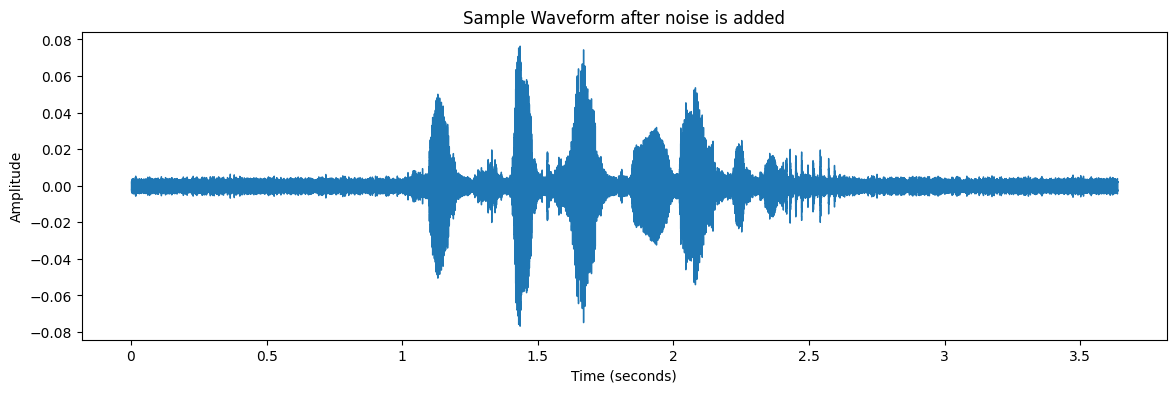

In [22]:
x = add_noise(audio_data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Sample Waveform after noise is added")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

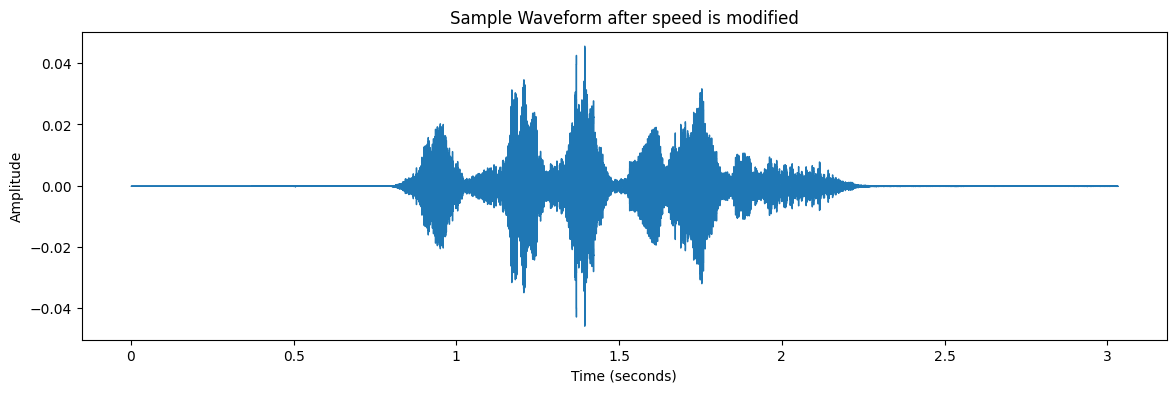

In [23]:
x = change_speed(audio_data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Sample Waveform after speed is modified")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

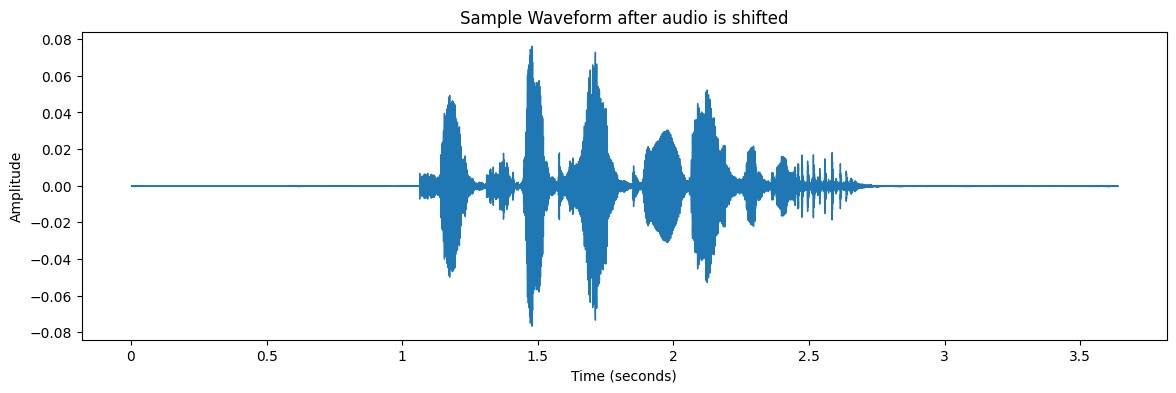

In [24]:
x = shift_audio(audio_data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Sample Waveform after audio is shifted")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

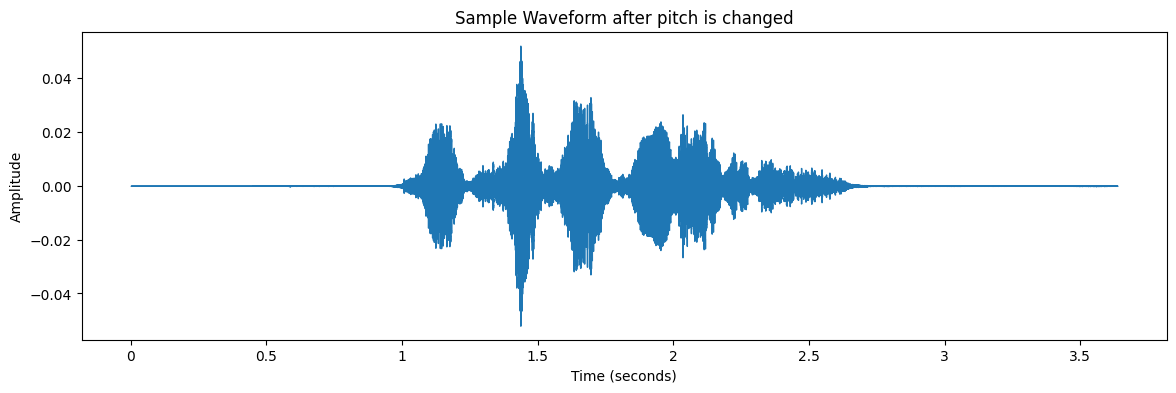

In [25]:
x = change_pitch(audio_data,sr)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Sample Waveform after pitch is changed")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [26]:
def extract_features(audio_data, sr):
    
    features = []

    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=audio_data)
    avg_zcr = np.mean(zcr)
    features.append(avg_zcr)

    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    avg_chroma = np.mean(chroma, axis=1)
    features.extend(avg_chroma)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
    avg_mfccs = np.mean(mfccs, axis=1)
    features.extend(avg_mfccs)

    # RMS Energy
    rms_energy = librosa.feature.rms(y=audio_data)
    avg_rms = np.mean(rms_energy)
    features.append(avg_rms)

    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
    avg_mel = np.mean(mel_spectrogram, axis=1)
    features.extend(avg_mel)
    
    feature_vector = np.array(features)

    return feature_vector

In [27]:
def get_audio_features(audio_path):
    
    # Load audio with specific duration and offset
    audio_data, sr = librosa.load(audio_path, sr=None, duration=2.5, offset=0.6)

    # Initialize a list to store feature sets
    feature_sets = []

    # Extract features from the original audio
    original_features = extract_features(audio_data, sr)
    feature_sets.append(original_features)

    # Add noise to the audio and extract features
    audio_with_noise = add_noise(audio_data)
    noise_features = extract_features(audio_with_noise, sr)
    feature_sets.append(noise_features)

    # Apply change speed and pitch shifting, then extract features
    stretched_audio = change_speed(audio_data)
    stretched_and_pitched_audio = shift_audio(stretched_audio, sr)
    stretched_pitch_features = extract_features(stretched_and_pitched_audio, sr)
    feature_sets.append(stretched_pitch_features)

    all_features = np.vstack(feature_sets)
    
    return all_features

In [28]:
x, y = [], []

for path, emotion in zip(Ravdess_df.Path, Ravdess_df.Emotions):
    feature = get_audio_features(path)
    for ele in feature:
        x.append(ele)
        y.append(emotion)

In [29]:
df = pd.DataFrame(x)
df['labels'] = y

df.head()

0         1         2         3         4         5         6  \
0  0.090058  0.482662  0.459785  0.420982  0.357161  0.365092  0.457069   
1  0.295990  0.521984  0.537957  0.513127  0.473622  0.518231  0.571286   
2  0.126856  0.441081  0.441282  0.387430  0.342021  0.406246  0.479657   
3  0.060322  0.425837  0.372271  0.398138  0.428762  0.437723  0.448234   
4  0.304239  0.478401  0.454190  0.525002  0.551262  0.543849  0.558406   

          7         8         9  ...           146           147  \
0  0.486252  0.484737  0.495579  ...  9.107989e-06  6.030573e-06   
1  0.547664  0.518317  0.535920  ...  2.358137e-04  2.339970e-04   
2  0.478826  0.495759  0.491515  ...  3.793459e-06  2.772997e-06   
3  0.503288  0.538101  0.512941  ...  7.604100e-07  6.949188e-07   
4  0.579621  0.609528  0.581290  ...  7.861126e-05  7.788687e-05   

            148           149           150           151           152  \
0  2.725033e-06  1.951339e-06  1.872080e-06  2.434932e-06  9.398870e-07   
1  2.297005e-04  2.366923e-04  2.398028e-04  2.297540e-04  2.337860e-04   
2  1.236488e-06  9.599905e-07  7.960942e-07  8.986834e-07  4.713312e-07   
3  3.338844e-07  1.237676e-07  8.034726e-08  7.542826e-08  3.263111e-08   
4  7.734232e-05  7.900672e-05  7.637383e-05  7.734892e-05  7.854911e-05   

            153           154    labels  
0  7.989661e-08  9.724439e-09  surprise  
1  2.355005e-04  2.302245e-04  surprise  
2  3.684102e-08  5.514095e-09  surprise  
3  8.932885e-09  7.871676e-09   neutral  
4  7.934048e-05  7.702978e-05   neutral  

[5 rows x 156 columns]

In [30]:
from sklearn.preprocessing import LabelEncoder

x = df.iloc[: ,:-1].values; y = df['labels'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [31]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'angry': 0, 'calm': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
x_train.shape

(3240, 155)

In [34]:
x_test.shape

(1080, 155)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %f is %f%%' % (i, acc))


Train accuracy for n_estimators = 5.000000 is 0.962963%

Train accuracy for n_estimators = 10.000000 is 0.995679%

Train accuracy for n_estimators = 20.000000 is 1.000000%

Train accuracy for n_estimators = 50.000000 is 1.000000%

Train accuracy for n_estimators = 100.000000 is 1.000000%


In [38]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.742593%


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    gbdt = GradientBoostingClassifier(n_estimators=i)
    gbdt.fit(x_train, y_train)
    pred = gbdt.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %d is %.2f%%' % (i, acc * 100))


Train accuracy for n_estimators = 5 is 53.92%

Train accuracy for n_estimators = 10 is 60.93%

Train accuracy for n_estimators = 20 is 70.65%

Train accuracy for n_estimators = 50 is 86.60%

Train accuracy for n_estimators = 100 is 97.53%


In [40]:
gbdt = GradientBoostingClassifier(n_estimators=100)
gbdt.fit(x_train, y_train)
pred = gbdt.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.669444%


In [41]:
from xgboost import XGBClassifier

n_estimators = [5, 10, 20, 50, 100]

for i in n_estimators:
    xgb = XGBClassifier(n_estimators=i, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_estimators = %d is %.2f%%' % (i, acc * 100))


Train accuracy for n_estimators = 5 is 89.44%

Train accuracy for n_estimators = 10 is 96.73%

Train accuracy for n_estimators = 20 is 99.63%

Train accuracy for n_estimators = 50 is 100.00%

Train accuracy for n_estimators = 100 is 100.00%


In [42]:
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for n_estimators = 100 is %f%%' % (acc))

Test accuracy for n_estimators = 100 is 0.802778%


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression

regularization_params = [0.001, 0.01, 0.1, 1, 10, 100]

for c in regularization_params:
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(x_train_scaled, y_train)
    pred = lr.predict(x_train_scaled)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for regularization parameter C = %.3f is %.2f%%' % (c, acc * 100))


Train accuracy for regularization parameter C = 0.001 is 40.40%

Train accuracy for regularization parameter C = 0.010 is 49.07%

Train accuracy for regularization parameter C = 0.100 is 54.72%

Train accuracy for regularization parameter C = 1.000 is 59.69%

Train accuracy for regularization parameter C = 10.000 is 63.83%

Train accuracy for regularization parameter C = 100.000 is 66.57%


In [46]:
lr = LogisticRegression(C=100, max_iter=1000)
lr.fit(x_train_scaled, y_train)
pred = lr.predict(x_test_scaled)
acc = accuracy_score(y_test, pred)
print('Test accuracy for C = 100 is %f%%' % (acc))

Test accuracy for C = 100 is 0.571296%


In [48]:
from sklearn.svm import SVC

regularization_params = [0.001, 0.01, 0.1, 1, 10, 100]

for c in regularization_params:
    svc = SVC(C=c, kernel='rbf', max_iter=1000)
    svc.fit(x_train_scaled, y_train)
    pred = svc.predict(x_train_scaled)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for regularization parameter C = %.3f is %.2f%%' % (c, acc * 100))


Train accuracy for regularization parameter C = 0.001 is 13.77%

Train accuracy for regularization parameter C = 0.010 is 13.77%

Train accuracy for regularization parameter C = 0.100 is 37.01%

Train accuracy for regularization parameter C = 1.000 is 54.94%

Train accuracy for regularization parameter C = 10.000 is 73.89%

Train accuracy for regularization parameter C = 100.000 is 90.52%


In [49]:
svc = SVC(C=100, kernel='rbf', max_iter=1000)
svc.fit(x_train_scaled, y_train)
pred = svc.predict(x_test_scaled)
acc = accuracy_score(y_test, pred)
print('Test accuracy for C = 100 is %f%%' % (acc))

Test accuracy for C = 100 is 0.733333%


In [51]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = [3, 5, 7, 10, 15, 25, 35]

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_train)
    acc = accuracy_score(y_train, pred)
    print('\nTrain accuracy for n_neighbors = %d is %.2f%%' % (i, acc * 100))


Train accuracy for n_neighbors = 3 is 72.99%

Train accuracy for n_neighbors = 5 is 65.62%

Train accuracy for n_neighbors = 7 is 59.91%

Train accuracy for n_neighbors = 10 is 54.75%

Train accuracy for n_neighbors = 15 is 49.72%

Train accuracy for n_neighbors = 25 is 45.93%

Train accuracy for n_neighbors = 35 is 42.81%


In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred)
print('Test accuracy for K = 3 is %f%%' % (acc))

Test accuracy for K = 3 is 0.447222%
